<a href="https://colab.research.google.com/github/mojtaba96/mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist 
 

11490434/11490434 [==============================] - 0s 0us/step


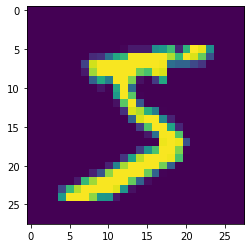

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()


In [4]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [6]:
X_train /= 255
X_test /= 255


In [7]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)


In [9]:

model = Sequential()


In [10]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))



In [11]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [12]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:

model.fit(X_train, Y_train, batch_size=32, epochs=1, verbose=1)
  

1875/1875 [==============================] - 120s 63ms/step - loss: 0.2074 - accuracy: 0.9370


In [22]:
from google.colab.patches import cv2_imshow

In [27]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
	print ("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	cv2_imshow(image)
	cv2.waitKey(0) 

1/1 [==============================] - 0s 19ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], predicted 8


1/1 [==============================] - 0s 18ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


1/1 [==============================] - 0s 17ms/step
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5


1/1 [==============================] - 0s 17ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], predicted 6


1/1 [==============================] - 0s 18ms/step
Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5


1/1 [==============================] - 0s 20ms/step
Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], predicted 2


1/1 [==============================] - 0s 27ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


1/1 [==============================] - 0s 19ms/step
Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


1/1 [==============================] - 0s 19ms/step
Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], predicted 8


1/1 [==============================] - 0s 22ms/step
Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], predicted 2
